#### 문장 분류 모델


[1] 데이터 불러오기 + 전처리<hr>
- 데이터 불러오기
- 문장 분리기 실행

In [1]:
import pandas as pd
import re
import numpy as np

In [2]:
# 불필요한 컬럼 제외하고 가져오기
dataDF= pd.read_csv('./분류정보.csv')

def make_kor(file, count):
    filterDF=pd.DataFrame()
    dataDF=pd.read_csv(file)         # 파일 읽기
    all=[]
    for text in dataDF['text']:
        a= re.sub('[^ㄱ-ㅎ가-힣.]+',' ',text)         #한글만 남겨놓기
        all.append(a)
    filterDF['text']=all
    filterDF['label']=count
    return filterDF

In [3]:
# 결측치 중복치 제거

dataDF=dataDF.dropna()
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, 0 to 253
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    249 non-null    object
 1   label   249 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [4]:

dataDF['label'].value_counts()

label
0    127
1    122
Name: count, dtype: int64

[2] 데이터 토큰화 및 불용어 제거 후 단어사전 생성<hr>

In [16]:
from konlpy.tag import Okt
from collections import Counter
from NLPfunc import *

In [17]:
len(dataDF)

249

In [18]:
# 학습, 테스트 분리 후 DS
dataDF=dataDF.reset_index(drop=True)
trainDF=dataDF.sample(frac=0.9, random_state=100)
testDF=dataDF.drop(trainDF.index)
print(trainDF.index)


# 토큰화 인스턴스
okt=Okt()

Index([ 65,  59, 194, 112, 192, 169, 152, 203, 214, 173,
       ...
       100, 211, 141, 129, 159, 132, 108, 155, 130,  86],
      dtype='int64', length=224)


In [19]:
testDF['label'].value_counts(), trainDF['label'].value_counts()

(label
 1    16
 0     9
 Name: count, dtype: int64,
 label
 0    118
 1    106
 Name: count, dtype: int64)

In [23]:
## 불용어 리스트 불러오는 함수
STOP_PATH = 'kor_stopwords.txt'


stopwords = make_stopwords(STOP_PATH)

In [25]:
# 토큰화 및 단어사전 생성
train_vocab= make_vocab(data=trainDF['text'], tag=okt, stopwords=stopwords, vocab_num=10000)
# test_vocab= make_vocab(data=testDF['text'], tag=okt, stopwords=stopwords, vocab_num=10000)

print(len(train_vocab))

1278


In [26]:
# 불용어 제거
t_vocab=train_vocab.copy()
for key, v in t_vocab.items():
    if key in stopwords:
        a= train_vocab.pop(key)

In [27]:
train_vocab.items()

dict_items([('<PAD>', 0), ('<UNK>', 1), ('.', 2), (',', 3), ('입니다', 4), ('상담', 5), ('세무사', 6), ('(', 7), ('신고', 8), ('과세', 9), ('경우', 10), ('주택', 11), (')', 12), ('공제', 13), ('하여', 14), ('됩니다', 15), ('합니다', 16), ('연말정산', 17), ('세무', 18), ('세', 19), ('-', 20), ('네이버', 21), (':', 22), ('가액', 23), ('할', 24), ('소득', 25), ('상속', 26), ('납부', 27), ('국세', 28), ('적용', 29), ('있습니다', 30), ('근로', 31), ('종합소득세', 32), ('1', 33), ('환급', 34), ('부동산', 35), ('위원', 36), ('부가가치세', 37), ('대한', 38), ('증여', 39), ('하면', 40), ('양도소득세', 41), ('답변', 42), ('재산', 43), ('추가', 44), ('지', 45), ('양도', 46), ('회사', 47), ('기', 48), ('세액', 49), ('김성주', 50), ('\\', 51), ('원단', 52), ('질문', 53), ('바랍니다', 54), ('되는', 55), ('u', 56), ('200', 57), ('b', 58), ('발생', 59), ('전문', 60), ('면', 61), ('금액', 62), ('상속세', 63), ('징수', 64), ('해당', 65), ('세금', 66), ('회계', 67), ('연락', 68), ('님', 69), ('계산', 70), ('소득세', 71), ('문의', 72), ('지방', 73), ('이나', 74), ('국세청', 75), ('법인', 76), ('아래', 77), ('후', 78), ('회원', 79), ('드립니다', 80), ('사업', 8

In [28]:
# 문장 벡터화
trainVec=vectorize(vocab=train_vocab, DF=trainDF, tokenizer=okt)
testVec=vectorize(vocab=train_vocab, DF=testDF, tokenizer=okt)

In [29]:
# 행당 길이 시각화
len_list=[]
for t in trainVec['text']:
    len_list.append(len(t))
    print(len(t))

15
69
5
23
8
12
11
8
13
6
26
24
90
15
5
32
23
13
26
10
38
13
18
34
6
32
45
9
27
13
39
18
17
11
14
19
6
24
49
43
26
41
15
15
27
10
31
89
39
12
28
6
10
88
32
106
47
29
26
14
28
12
7
35
11
22
47
43
13
34
4
51
25
88
8
13
30
49
49
14
36
34
11
47
3
7
71
5
15
12
28
9
28
22
10
13
7
7
59
38
12
10
74
11
10
40
17
3
40
21
74
7
34
12
16
21
17
5
16
31
13
39
10
39
13
21
15
14
14
13
5
21
5
27
4
25
22
36
72
24
3
7
8
88
95
87
10
7
17
45
30
36
32
19
15
19
13
8
19
38
10
14
34
10
13
13
12
66
7
17
19
28
37
4
24
9
8
35
6
18
22
16
15
3
13
6
16
19
2
17
9
10
28
16
36
7
76
11
78
10
29
37
9
32
10
11
7
53
21
6
15
10
16
24
22
8
14
8
2
4
14
10
10
37


((array([76., 62., 33., 26., 10.,  1.,  6.,  2.,  7.,  1.]),
  array([  2. ,  12.4,  22.8,  33.2,  43.6,  54. ,  64.4,  74.8,  85.2,
          95.6, 106. ]),
  <BarContainer object of 10 artists>),
 23.870535714285715,
 16.0)

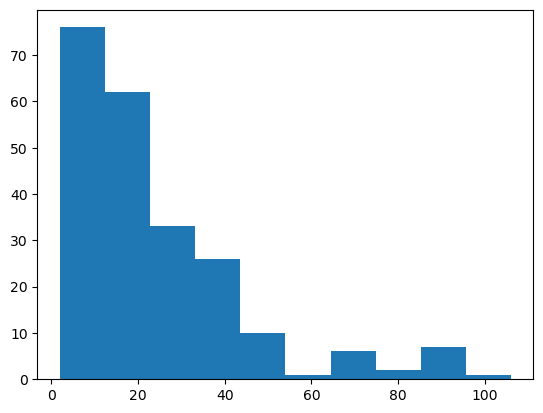

In [30]:
plt.hist(len_list), np.mean(len_list), np.median(len_list)

In [31]:
train_pad=padding(length=100, textList=trainVec['text'])
trainPad=trainVec.copy()
trainPad['text']=train_pad
test_pad= padding(length=100, textList=testVec['text'])
testPad=testVec.copy()
testPad['text']=test_pad

[3] 모델 설계 및 훈련 진행<hr>
- 라벨: 3개 (분류)
- 알고리즘: rnn/ lstm
- 0:교육, 1:환경, 2:의료/식품

In [32]:
# 데이터셋, 데이터로더 생성
import torch

train_tensor=torch.tensor(train_pad)
train_label= torch.FloatTensor(trainVec['label'].values).long()

test_tensor=torch.tensor(test_pad)
test_label= torch.FloatTensor(testVec['label'].values).long()

trainDS=TextDataset(train_tensor, train_label)
testDS= TextDataset(test_tensor, test_label)

trainDL=DataLoader(trainDS, batch_size=50)
testDL=DataLoader(testDS, batch_size=50)


In [33]:
# 데이터로더 확인
for f, t in trainDL:
    print(f.shape)
    break

torch.Size([50, 100])


In [34]:
import torch.nn as nn
from typing import Literal
from torch import optim
import os


In [35]:
# 커스텀 모델 및 파라미터 설정

# 모델 파라미터
n_vocab= len(train_vocab)
hidden_dim= 64
embedding_dim= 128
n_layers= 2
device= 'cuda' if torch.cuda.is_available() else 'cpu'

# 커스텀 모델 생성
classifier= textCLF(
    n_vocab=n_vocab, hidden_dim=hidden_dim, 
    embedding_dim=embedding_dim, n_layers=n_layers, model_type='lstm'
).to(device)

# 최적화 설정
optimizer= optim.Adam(classifier.parameters(), lr=0.01)

# 모델 저장 위치 지정
SAVE_PATH='./model_final/'
SAVE_FILE='newsclf_all.pth'
if not os.path.exists(SAVE_PATH):
    os.mkdir(SAVE_PATH)

In [1]:
from get_train_model import *

ModuleNotFoundError: No module named 'get_model'

In [24]:
import pickle

In [39]:
LOSS_HISTORY, SCORE_HISTORY, ep= model_training(model= classifier, trainDL=trainDL,
                                            testDL=testDL, optimizer=optimizer,
                                            epoch=50, LIMIT=5, SAVE_PATH=SAVE_PATH,
                                            SAVE_FILE=SAVE_FILE, numcls=3,
                                            break_param='score', save_type='all',
                                            type='muticlass', optim_type='score', device=device)


NameError: name 'model_training' is not defined

In [26]:
# 단어사전 피클로 저장
with open('vocab.pikle', mode='wb') as f:
    pickle.dump(train_vocab, f)

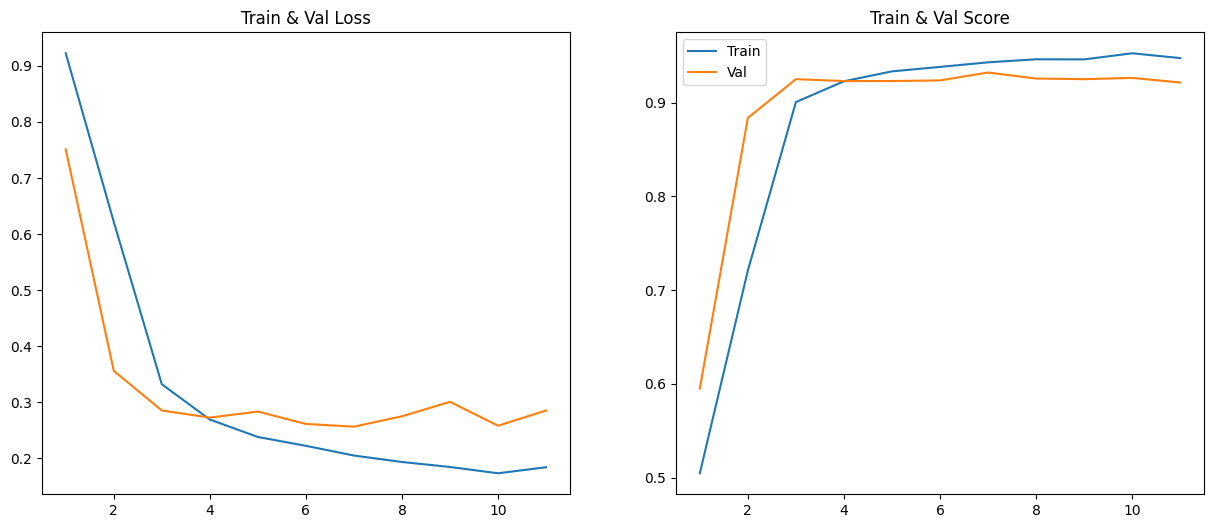

In [27]:
# 시각화
draw_result(EPOCH=ep, LOSS_HISTORY=LOSS_HISTORY, SCORE_HISTORY=SCORE_HISTORY)

In [29]:
# 검증
PATH='./model8newsclf_all.pth'
text='[제주=뉴시스] 양영전 기자 = 제주도교육청은 오는 12~13일 협재해수욕장과 표선해수욕장에서 2024년 제주바다쓰레기저감실천 캠페인 우리 처음 만난 바다처럼을 운영한다고 11일 밝혔다.'
test_model= torch.load(PATH)
from predict import *
# 한글만 남기고 모두 제거
a= re.sub('[^ㄱ-ㅎ가-힣]+',' ',text)
tokenizer=Okt()
# 토큰화
token_text=tokenizer.morphs(a)

#단어사전을 통한 벡터화
# 단어사전 불러오기
with open('vocab.pikle', 'rb') as f:
    test_vocab=pickle.load(f)
# 벡터화
vec_token= vectorize(vocab=test_vocab, DF=token_text, tokenizer=tokenizer)

# 패딩
vec_token= padding(length=50, text=vec_token)
vec_token=vec_token[0]
token_torch=torch.FloatTensor(vec_token).long()
print(token_torch)

test_model.eval()
with torch.no_grad():

    predict_mcf2(model=test_model, data=token_torch, result=['교육', '환경', '음식'])

FileNotFoundError: [Errno 2] No such file or directory: './model8newsclf_all.pth'

In [36]:
from sklearn.metrics import classification_report
# 시도 1 약 90점
model=torch.load('./model_final/try_1.pth',weights_only=False)
testDL=DataLoader(testDS,batch_size=len(testDS))
for feature, target in testDL:
    pre_y=model(feature)
    print(classification_report(target.detach().numpy(),torch.argmax(pre_y,dim=1).numpy()))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       507
           1       0.91      0.92      0.91       485
           2       0.89      0.86      0.88       495

    accuracy                           0.90      1487
   macro avg       0.90      0.90      0.90      1487
weighted avg       0.90      0.90      0.90      1487



In [37]:
# 시도 2 
# -> embedding 층 128-> 64
model=torch.load('./model_final/try_2.pth',weights_only=False)
testDL=DataLoader(testDS,batch_size=len(testDS))
for feature, target in testDL:
    pre_y=model(feature)
    print(classification_report(target.detach().numpy(),torch.argmax(pre_y,dim=1).numpy()))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       507
           1       0.90      0.92      0.91       485
           2       0.91      0.85      0.88       495

    accuracy                           0.90      1487
   macro avg       0.90      0.90      0.90      1487
weighted avg       0.90      0.90      0.90      1487



In [55]:
# 시도 3
# -> n_layers 2-> 4 
model=torch.load('./model_final/try_3.pth',weights_only=False)
testDL=DataLoader(testDS,batch_size=len(testDS))
for feature, target in testDL:
    pre_y=model(feature)
    print(classification_report(target.detach().numpy(),torch.argmax(pre_y,dim=1).numpy()))
# 성능 약간 다운

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       507
           1       0.86      0.92      0.89       485
           2       0.90      0.83      0.87       495

    accuracy                           0.89      1487
   macro avg       0.89      0.89      0.89      1487
weighted avg       0.89      0.89      0.89      1487



In [65]:
# 시도 4
# -> h_dim 64 -> 32
model=torch.load('./model_final/try_4.pth',weights_only=False)
testDL=DataLoader(testDS,batch_size=len(testDS))
for feature, target in testDL:
    pre_y=model(feature)
    print(classification_report(target.detach().numpy(),torch.argmax(pre_y,dim=1).numpy()))
# 처음이랑 거의 비슷

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       507
           1       0.90      0.93      0.91       485
           2       0.89      0.87      0.88       495

    accuracy                           0.91      1487
   macro avg       0.91      0.91      0.91      1487
weighted avg       0.91      0.91      0.91      1487



In [74]:
# 시도 5
# -> lstm -> rnn
model=torch.load('./model_final/try_5.pth',weights_only=False)
testDL=DataLoader(testDS,batch_size=len(testDS))
for feature, target in testDL:
    pre_y=model(feature)
    print(classification_report(target.detach().numpy(),torch.argmax(pre_y,dim=1).numpy()))
# 진짜 별로네..

              precision    recall  f1-score   support

           0       0.66      0.80      0.72       507
           1       0.45      0.21      0.29       485
           2       0.48      0.61      0.54       495

    accuracy                           0.55      1487
   macro avg       0.53      0.54      0.51      1487
weighted avg       0.53      0.55      0.52      1487



In [176]:
# 최적의 패딩값
# 85 -> 0.91
# 200 -> 0.921
# 367(평균) -> 0.93
# 318(중앙값) -> 0.92
# +++ 패딩값을 늘릴수록 학습이 길어짐..
model=torch.load('./model_final/try_6.pth',weights_only=False)
testDL=DataLoader(testDS,batch_size=len(testDS))
for feature, target in testDL:
    pre_y=model(feature)
    print(classification_report(target.detach().numpy(),torch.argmax(pre_y,dim=1).numpy()))


              precision    recall  f1-score   support

           0       0.95      0.92      0.93       507
           1       0.90      0.96      0.93       485
           2       0.91      0.89      0.90       495

    accuracy                           0.92      1487
   macro avg       0.92      0.92      0.92      1487
weighted avg       0.92      0.92      0.92      1487



In [34]:
# def predict_mcf(model, data, result):
#     # dataTS=torch.FloatTensor(data).reshape(1,-1)
#     pre_val=model(dataTS)
#     pre_val=F.softmax(pre_val, dim=1)
#     print(f'{result[pre_val]}: {max(pre_val[0].detach()):.4f}')
#     return f'{result[pre_val]}: {max(pre_val[0].detach()):.4f}'

In [43]:
def predict_mcf2(model, data, result):
    dataTS=data.reshape(1,-1) #torch.FloatTensor(data).reshape(1,-1)
    pre_val=model(dataTS)
    pre_val=F.softmax(pre_val, dim=1)
    num=pre_val.argmax(dim=1)
    print(pre_val, pre_val.argmax(dim=1))
    print(f'{result[num]}: {max(pre_val[0].detach()):.4f}')
    return f'{result[num]}: {max(pre_val[0].detach()):.4f}'

In [53]:
model=torch.load('./model_final/try_2.pth',weights_only=False)
testDL=DataLoader(testDS,batch_size=len(testDS))
result_idx=['교육', '환경', '음식/의료']
count=0
for feature, target in testDL:
    count+=1
    a=predict_mcf2(model, feature, result_idx)
    print(a, target)
    if count==5: break

RuntimeError: [enforce fail at alloc_cpu.cpp:114] data. DefaultCPUAllocator: not enough memory: you tried to allocate 3451764736 bytes.